In [1]:
# --- Cell 1: Load Human_66.mat ---
# Data from https://github.com/adrianponce/DynamicMeanFieldModel/blob/main/Human_66.mat
from pathlib import Path
import numpy as np
import hdf5storage

mat_path = Path("Human_66.mat")
H = hdf5storage.loadmat(str(mat_path))

meaning = {
    "Order": "ROI permutation for reordering matrices",
    "C": "SC weights (66x66)",
    "L": "fiber length / distance (66x66)",
    "FC_emp": "empirical FC-like matrix (may be transformed)",
    "anat_lbls": "ROI labels (66)",
    "talairach_66": "ROI Talairach coords (66x3)",
}

print(f"Loaded: {mat_path.resolve()}\n")
for k, v in sorted((k, v) for k, v in H.items() if not k.startswith("__")):
    if isinstance(v, np.ndarray):
        print(f"{k:12s} | ndarray | dtype={v.dtype} | shape={v.shape} | {meaning.get(k,'')}")
    else:
        print(f"{k:12s} | {type(v).__name__} | {meaning.get(k,'')}")


Loaded: /Users/zixuan.zhouchildmind.org/Documents/GitHub/neuronumba/notebooks/Human_66.mat

C            | ndarray | dtype=float64 | shape=(66, 66) | SC weights (66x66)
FC_emp       | ndarray | dtype=float64 | shape=(66, 66) | empirical FC-like matrix (may be transformed)
L            | ndarray | dtype=float64 | shape=(66, 66) | fiber length / distance (66x66)
Order        | ndarray | dtype=uint8 | shape=(1, 66) | ROI permutation for reordering matrices
anat_lbls    | ndarray | dtype=<U5 | shape=(66,) | ROI labels (66)
talairach_66 | ndarray | dtype=float64 | shape=(66, 3) | ROI Talairach coords (66x3)


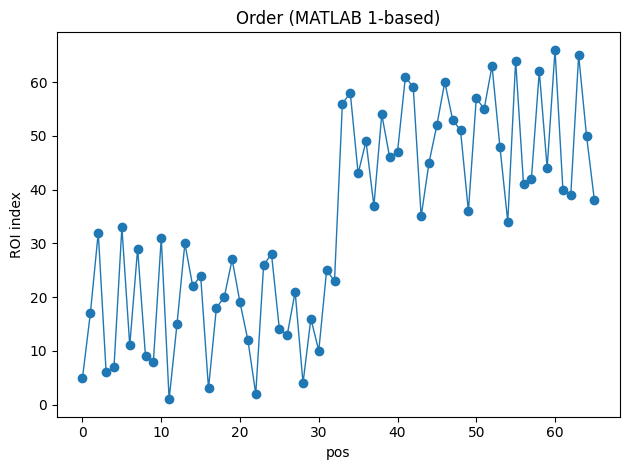

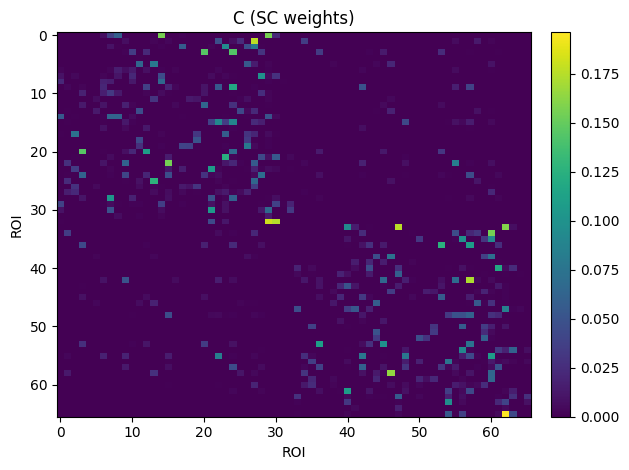

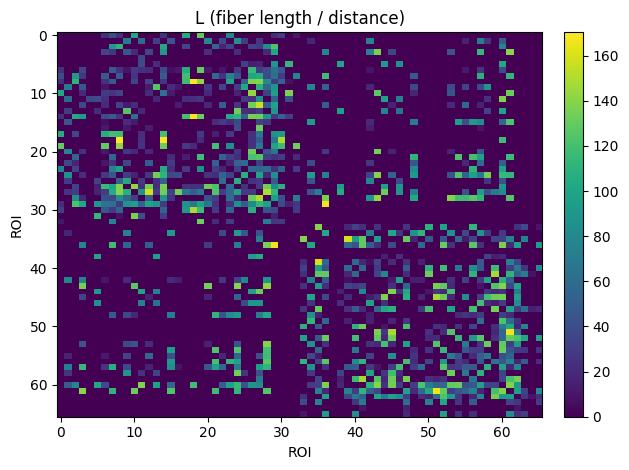

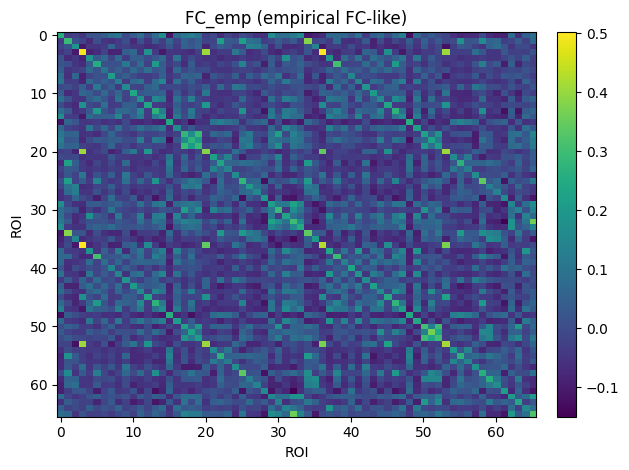

anat_lbls (1..66):
rBSTS,  rCAC,  rCMF,  rCUN,  rENT,   rFP,  rFUS,   rIP,   rIT, rISTC, rLOCC,  rLOF, rLING,  rMOF,   rMT, rPARC, rPARH, rPOPE, rPORB, rPTRI, rPCAL, rPSTC,   rPC, rPREC, rPCUN,  rRAC,  rRMF,   rSF,   rSP,   rST, rSMAR,   rTP,   rTT, lBSTS,  lCAC,  lCMF,  lCUN,  lENT,   lFP,  lFUS,   lIP,   lIT, lISTC, lLOCC,  lLOF, lLING,  lMOF,   lMT, lPARC, lPARH, lPOPE, lPORB, lPTRI, lPCAL, lPSTC,   lPC, lPREC, lPCUN,  lRAC,  lRMF,   lSF,   lSP,   lST, lSMAR,   lTP,   lTT

Talairach coords (first 10 rows shown):
 1:    50.71   -38.43     5.14
 2:     6.50    21.25    27.50
 3:    35.31    13.15    41.92
 4:    10.40   -78.80    22.10
 5:    26.00    -7.00   -26.50
 6:     9.00    63.00    -8.00
 7:    36.00   -45.82   -13.55
 8:    43.93   -60.43    29.07
 9:    50.53   -28.79   -18.74
10:    11.00   -43.75    22.50
... (66 total)


In [2]:
# --- Cell 2: Visualize Order / C / L / FC_emp + show labels & coords ---
import matplotlib.pyplot as plt

Order = np.asarray(H["Order"]).ravel()
C, L, FC = (np.asarray(H[k], dtype=float) for k in ["C", "L", "FC_emp"])
labels = np.asarray(H["anat_lbls"]).ravel()
tal = np.asarray(H["talairach_66"], dtype=float)

plt.figure(); plt.plot(Order, marker="o", lw=1); plt.title("Order (MATLAB 1-based)"); plt.xlabel("pos"); plt.ylabel("ROI index"); plt.tight_layout(); plt.show()

for M, title in [(C, "C (SC weights)"), (L, "L (fiber length / distance)"), (FC, "FC_emp (empirical FC-like)")]:
    plt.figure(); im = plt.imshow(M, aspect="auto"); plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title(title); plt.xlabel("ROI"); plt.ylabel("ROI"); plt.tight_layout(); plt.show()

print("anat_lbls (1..66):")
print(", ".join(map(str, labels.tolist())))

print("\nTalairach coords (first 10 rows shown):")
for i, (x, y, z) in enumerate(tal[:10], start=1):
    print(f"{i:2d}: {x:8.2f} {y:8.2f} {z:8.2f}")
print(f"... ({tal.shape[0]} total)")


In [3]:
# --- Cell 3: Symmetry + diag/off-diag stats for C / L / FC_emp ---
def report(A, name, atol=1e-12, rtol=1e-10):
    A = np.asarray(A, dtype=float); n = A.shape[0]
    diag = np.diag(A); off = A[~np.eye(n, dtype=bool)]
    print(f"== {name} ==")
    print(f"shape={A.shape}, symmetric={np.allclose(A, A.T, atol=atol, rtol=rtol)}, max|A-A.T|={np.max(np.abs(A-A.T)):.3e}")
    print(f"diag     : min={diag.min():.6g}, max={diag.max():.6g}, mean={diag.mean():.6g}")
    print(f"off-diag : min={off.min():.6g}, max={off.max():.6g}, mean={off.mean():.6g}\n")

for M, nm in [(C, "C"), (L, "L"), (FC, "FC_emp")]:
    report(M, nm)


== C ==
shape=(66, 66), symmetric=False, max|A-A.T|=1.691e-01
diag     : min=0, max=0, mean=0
off-diag : min=0, max=0.196156, mean=0.00356676

== L ==
shape=(66, 66), symmetric=True, max|A-A.T|=5.684e-14
diag     : min=0, max=0, mean=0
off-diag : min=0, max=170.377, mean=17.1865

== FC_emp ==
shape=(66, 66), symmetric=False, max|A-A.T|=5.960e-08
diag     : min=0.104127, max=0.491515, mean=0.238766
off-diag : min=-0.150268, max=0.501696, mean=0.00543707



### Notes from Cell 3

- **C (structural connectivity)** is clearly **asymmetric**, so it should not be treated as a symmetric connectivity matrix.

- **FC_emp** has unusual properties:
  - Only **weakly symmetric**
  - **Diagonal values are not constant** (≈ 0.1–0.5, not 1)
  - **Off-diagonal mean is close to zero**

  These features indicate that **`FC_emp` is not a raw empirical FC (Pearson correlation) matrix**.

In [4]:
# --- Cell 4: Load EmpiricalFC.mat ---
# Data from https://github.com/adrianponce/DynamicMeanFieldModel/blob/main/EmpiricalFC.mat
from pathlib import Path
import numpy as np
import hdf5storage

emp_path = Path("EmpiricalFC.mat")
E = hdf5storage.loadmat(str(emp_path))

meaning = {
    "Cb": "Empirical FC (correlation-like; diag = 1)",
    "Pv": "does not appear to be p-values corresponding to Cb entries",
    "U1": "Leading eigenvector of Cb",
    "e1": "Eigenvalue corresponding to U1",
}

print(f"Loaded: {emp_path.resolve()}\n")
for k, v in sorted((k, v) for k, v in E.items() if not k.startswith("__")):
    if isinstance(v, np.ndarray):
        print(f"{k:6s} | ndarray | dtype={v.dtype} | shape={v.shape} | {meaning.get(k,'')}")
    else:
        print(f"{k:6s} | {type(v).__name__} | {meaning.get(k,'')}")


Loaded: /Users/zixuan.zhouchildmind.org/Documents/GitHub/neuronumba/notebooks/EmpiricalFC.mat

Cb     | ndarray | dtype=float64 | shape=(66, 66) | Empirical FC (correlation-like; diag = 1)
Pv     | ndarray | dtype=float64 | shape=(66, 66) | does not appear to be p-values corresponding to Cb entries
U1     | ndarray | dtype=float64 | shape=(66, 1) | Leading eigenvector of Cb
e1     | ndarray | dtype=float64 | shape=(1, 1) | Eigenvalue corresponding to U1


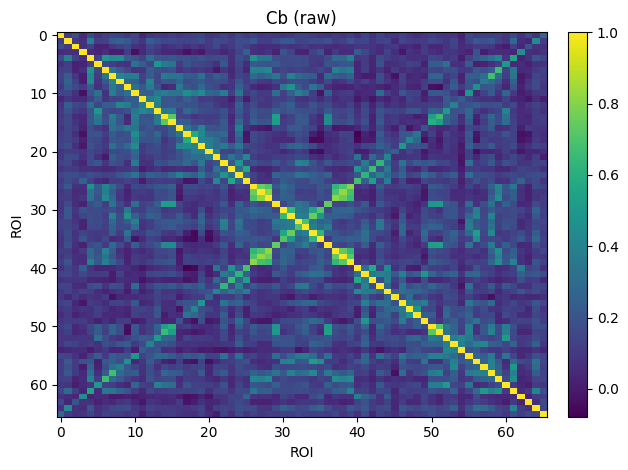

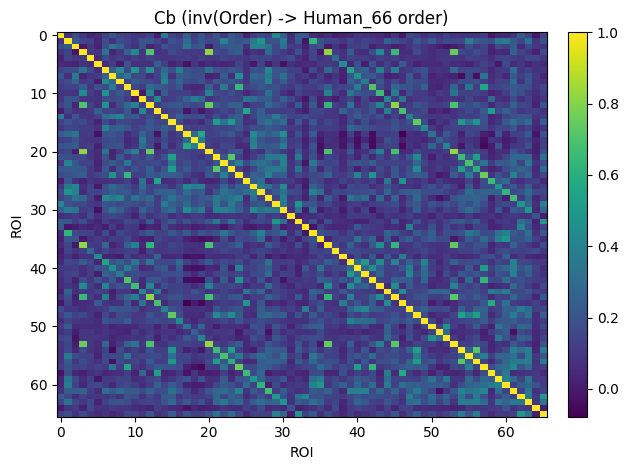

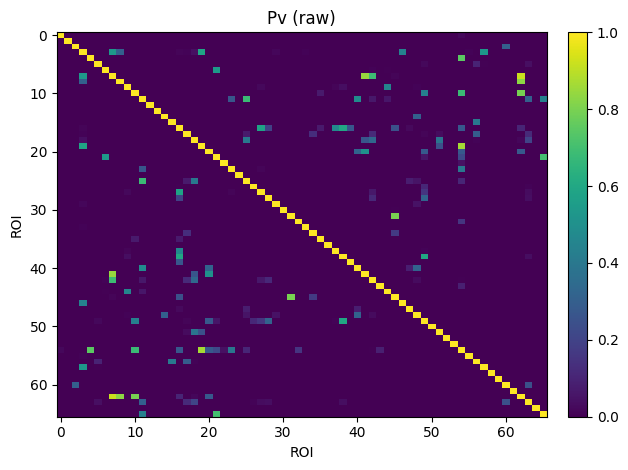

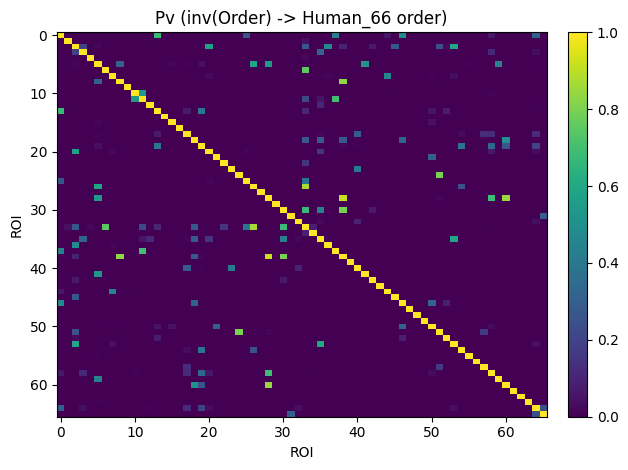

Check Cb @ U1 ≈ e1 * U1:  relative error = 1.682e-15,  max|diff| = 5.107e-15


In [5]:
# --- Cell 5: Visualize Cb/Pv (raw vs reordered by inverse(Order)) + check Cb@U1 ≈ e1*U1 ---
import matplotlib.pyplot as plt

Cb = np.asarray(E["Cb"], dtype=float)
Pv = np.asarray(E["Pv"], dtype=float)
U1 = np.asarray(E["U1"], dtype=float).reshape(-1, 1)
e1 = float(np.asarray(E["e1"]).squeeze())

# inverse permutation to map EmpiricalFC order -> Human_66 order
H = hdf5storage.loadmat(str(Path("Human_66.mat")))
order = np.asarray(H["Order"]).astype(int).ravel() - 1  # 0..65
inv = np.empty_like(order); inv[order] = np.arange(order.size)

Cb_inv = Cb[inv][:, inv]
Pv_inv = Pv[inv][:, inv]

# heatmaps: raw vs reordered
for M, t in [(Cb, "Cb (raw)"), (Cb_inv, "Cb (inv(Order) -> Human_66 order)"),
             (Pv, "Pv (raw)"), (Pv_inv, "Pv (inv(Order) -> Human_66 order)")]:
    plt.figure(); im = plt.imshow(M, aspect="auto"); plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title(t); plt.xlabel("ROI"); plt.ylabel("ROI"); plt.tight_layout(); plt.show()

# eigen check: relative residual ||CbU - eU|| / ||CbU||
lhs = Cb @ U1
rhs = e1 * U1
rel_err = np.linalg.norm(lhs - rhs) / (np.linalg.norm(lhs) + 1e-12)
max_abs = np.max(np.abs(lhs - rhs))
print(f"Check Cb @ U1 ≈ e1 * U1:  relative error = {rel_err:.3e},  max|diff| = {max_abs:.3e}")


In [6]:
# --- Cell 6: Symmetry + diag/off-diag stats for Cb / Pv ---
def report(A, name, atol=1e-12, rtol=1e-10):
    A = np.asarray(A, dtype=float); n = A.shape[0]
    diag = np.diag(A); off = A[~np.eye(n, dtype=bool)]
    print(f"== {name} ==")
    print(f"shape={A.shape}, symmetric={np.allclose(A, A.T, atol=atol, rtol=rtol)}, max|A-A.T|={np.max(np.abs(A-A.T)):.3e}")
    print(f"diag     : min={diag.min():.6g}, max={diag.max():.6g}, mean={diag.mean():.6g}")
    print(f"off-diag : min={off.min():.6g}, max={off.max():.6g}, mean={off.mean():.6g}\n")

report(Cb, "Cb (raw)")
report(Pv, "Pv (raw)")


== Cb (raw) ==
shape=(66, 66), symmetric=True, max|A-A.T|=1.110e-16
diag     : min=1, max=1, mean=1
off-diag : min=-0.0783059, max=0.828646, mean=0.160238

== Pv (raw) ==
shape=(66, 66), symmetric=True, max|A-A.T|=0.000e+00
diag     : min=1, max=1, mean=1
off-diag : min=0, max=0.920154, mean=0.0122858



In [7]:
# --- Cell 7: Save aligned Cb (inv(Order)) + symmetrized C to Human_66_Emp.mat ---
C_sym = 0.5 * (np.asarray(H["C"], dtype=float) + np.asarray(H["C"], dtype=float).T)

out_path = Path("Human_66_Emp.mat")
if out_path.exists():
    out_path.unlink()
hdf5storage.savemat(
    str(out_path),
    {
        "FC_emp": Cb_inv,  # Empirical FC aligned to Human_66 order
        "C": C_sym,        # Symmetrized SC
    },
    format="7.3"
)

print(f"Saved: {out_path.resolve()}")


Saved: /Users/zixuan.zhouchildmind.org/Documents/GitHub/neuronumba/notebooks/Human_66_Emp.mat


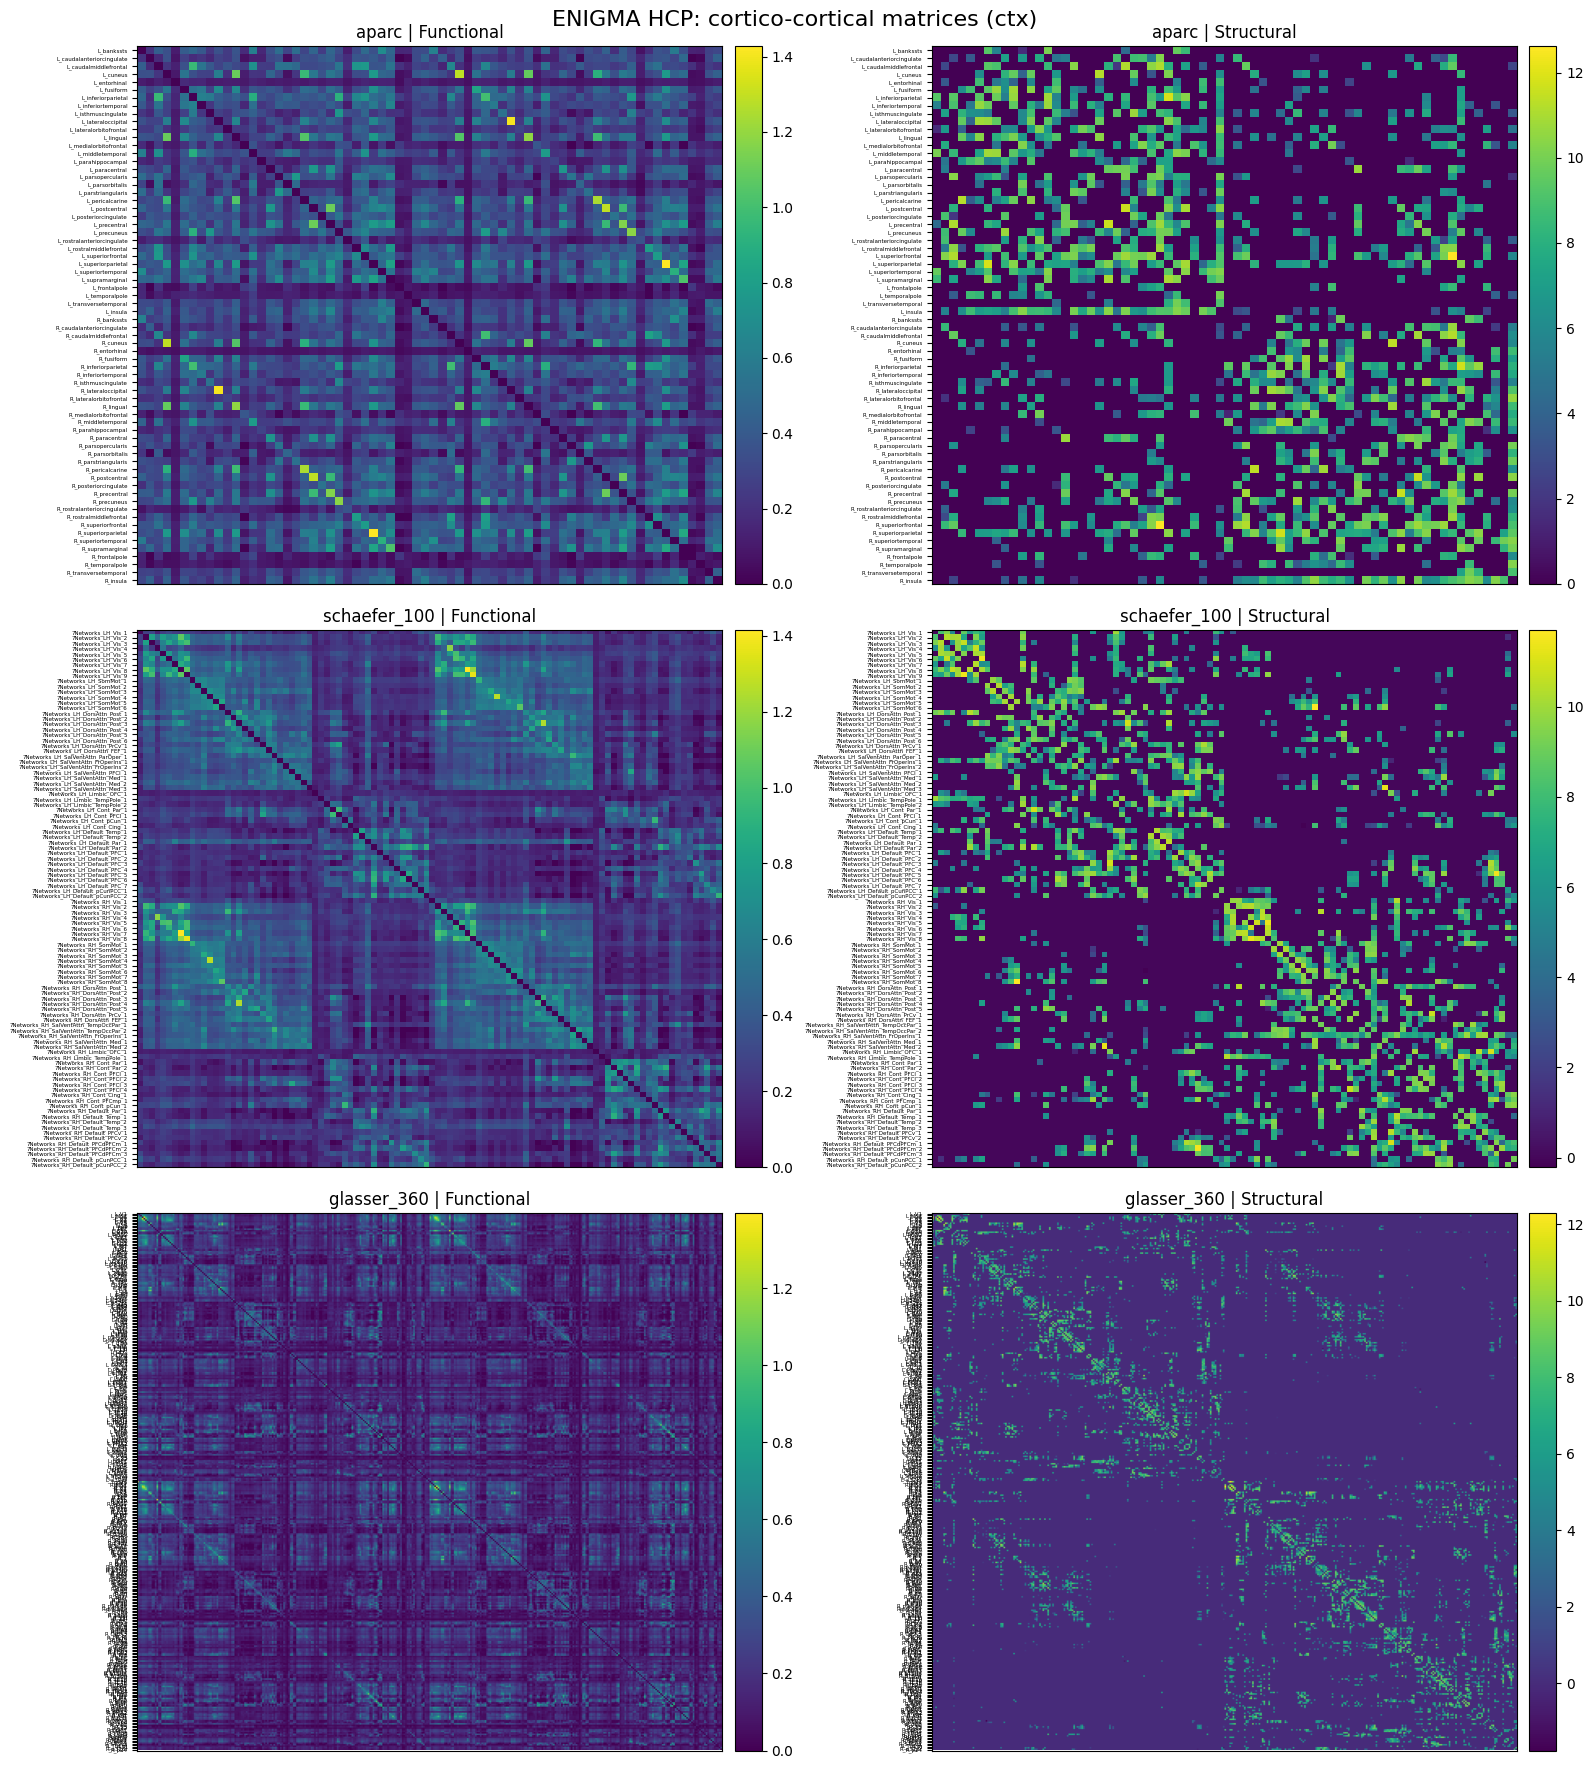

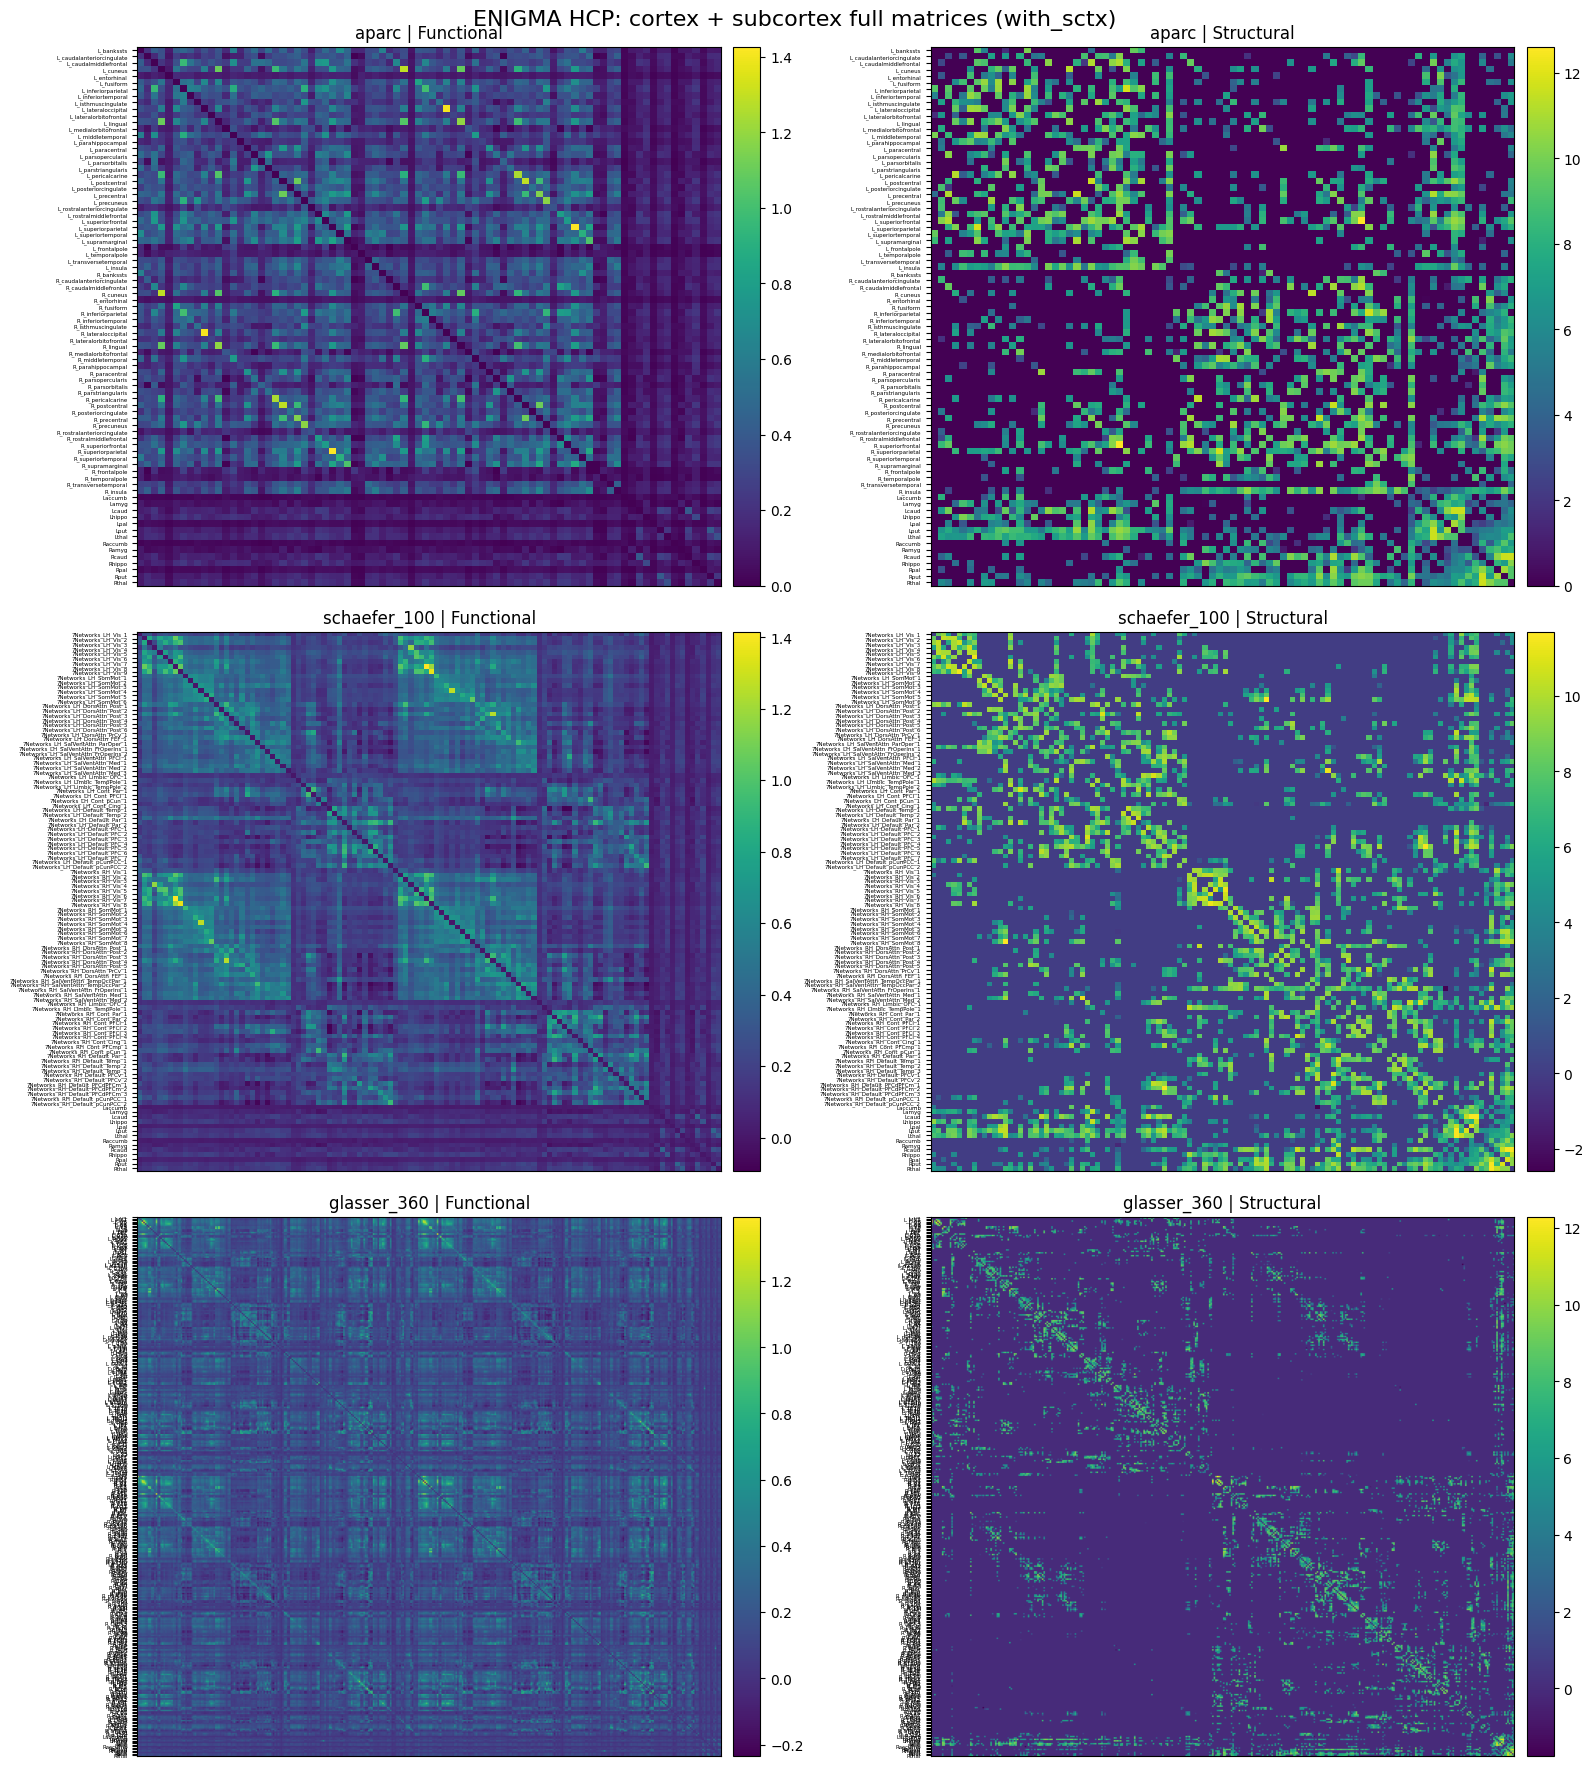

In [8]:
# --- Cell 8: Load 18 ENIGMA HCP connectivity CSVs + plot ---
# Data from https://github.com/MICA-MNI/ENIGMA/tree/master/enigmatoolbox/datasets/matrices/hcp_connectivity
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

root = Path("hcp_connectivity")
parcs = [("", "aparc"), ("_schaefer_100", "schaefer_100"), ("_glasser_360", "glasser_360")]

def read_mat(p):
    df = pd.read_csv(p, header=None)
    x = pd.to_numeric(df.stack(), errors="coerce").unstack()  # force numeric; non-numeric -> NaN
    x = x.dropna(axis=0, how="all").dropna(axis=1, how="all") # drop pure-NaN rows/cols (headers)
    return x.to_numpy(dtype=float)

def read_labels(p):
    df = pd.read_csv(p, header=None)
    return df.values.flatten().astype(str).tolist()

data = {}
for suf, name in parcs:
    for kind in ["ctx", "with_sctx"]:
        lab = read_labels(root / f"Labels_{kind}{suf}.csv")
        FC  = read_mat(root / f"funcMatrix_{kind}{suf}.csv")
        C   = read_mat(root / f"strucMatrix_{kind}{suf}.csv")
        data[(name, kind)] = dict(Label=lab, FC_emp=FC, C=C)

def plot_block(kind, title):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
    fig.suptitle(title, fontsize=16, y=0.98)

    for r, (_, name) in enumerate(parcs):
        d = data[(name, kind)]
        lab = d["Label"]
        for c, (M, t) in enumerate([(d["FC_emp"], "Functional"), (d["C"], "Structural")]):
            ax = axes[r, c]
            im = ax.imshow(M, aspect="auto")
            ax.set_title(f"{name} | {t}", fontsize=12)
            ax.set_xticks([])  # keep clean; labels only on y-axis
            ax.set_yticks(np.arange(len(lab)))
            ax.set_yticklabels(lab, fontsize=4)
            fig.colorbar(im, ax=ax, fraction=0.046, pad=0.02)

    plt.tight_layout()
    plt.show()

plot_block("ctx", "ENIGMA HCP: cortico-cortical matrices (ctx)")
plot_block("with_sctx", "ENIGMA HCP: cortex + subcortex full matrices (with_sctx)")


In [9]:
# --- Cell 9: Symmetry + diag/off-diag stats for all 12 matrices (FC + SC across 6 groups) ---
def stats_mat(A):
    A = np.asarray(A, float); n = A.shape[0]
    diag = np.diag(A); off = A[~np.eye(n, dtype=bool)]
    return dict(
        symmetric=np.allclose(A, A.T, atol=1e-12, rtol=1e-10),
        max_asym=float(np.max(np.abs(A - A.T))),
        diag_min=float(diag.min()), diag_max=float(diag.max()), diag_mean=float(diag.mean()),
        off_min=float(off.min()),   off_max=float(off.max()),   off_mean=float(off.mean()),
    )

rows = []
for (name, kind), d in data.items():
    for key in ["FC_emp", "C"]:
        s = stats_mat(d[key])
        rows.append(dict(group=f"{name}|{kind}", matrix=key, **s))

df = pd.DataFrame(rows)
with pd.option_context(
    "display.float_format",
    lambda x: f"{x:.3e}" if abs(x) < 1e-2 else f"{x:.3f}"
):
    print(df.to_string(index=False))


                 group matrix  symmetric  max_asym  diag_min  diag_max  diag_mean   off_min  off_max  off_mean
             aparc|ctx FC_emp       True 1.055e-15 0.000e+00 0.000e+00  0.000e+00 0.000e+00    1.427     0.312
             aparc|ctx      C       True 0.000e+00 0.000e+00 0.000e+00  0.000e+00 0.000e+00   12.615     2.266
       aparc|with_sctx FC_emp       True 0.000e+00 0.000e+00 0.000e+00  0.000e+00 0.000e+00    1.427     0.245
       aparc|with_sctx      C       True 0.000e+00 0.000e+00 0.000e+00  0.000e+00 0.000e+00   12.615     2.533
      schaefer_100|ctx FC_emp       True 0.000e+00 0.000e+00 0.000e+00  0.000e+00 0.000e+00    1.416     0.300
      schaefer_100|ctx      C       True 0.000e+00 0.000e+00 0.000e+00  0.000e+00    -0.212   11.707     1.596
schaefer_100|with_sctx FC_emp       True 0.000e+00 0.000e+00 0.000e+00  0.000e+00    -0.093    1.416     0.252
schaefer_100|with_sctx      C       True 0.000e+00 0.000e+00 0.000e+00  0.000e+00    -2.584   11.707     1.794
 

### Notes from Cell 9

- Some **structural connectivity (C)** matrices contain **negative values**.

- **All functional connectivity matrices (FC_emp)** show **values greater than 1**. This indicates that they are **not raw Pearson correlations**; they **may have undergone Fisher z-transformation or a similar post-processing step**, although this cannot be confirmed from the matrices alone.

In [10]:
# --- Cell 10: preprocess then save to .mat ---
import hdf5storage

out = {}
for (name, kind), d in data.items():
    suf = ""
    if kind == "with_sctx":
        suf += "_with_sctx"
    if name == "schaefer_100":
        suf += "_schaefer_100"
    elif name == "glasser_360":
        suf += "_glasser_360"

    # --- preprocess C ---
    C = np.asarray(d["C"], dtype=float)
    C = np.maximum(C, 0.0)                      # negatives -> 0
    mx = np.max(C)
    if mx > 0:
        C = C * (0.2 / mx)                      # rescale to max=0.2

    # --- preprocess FC_emp (assume Fisher z-like) ---
    FCz = np.asarray(d["FC_emp"], dtype=float)
    FC = np.tanh(FCz)                           # inverse Fisher z

    out[f"C{suf}"]      = C
    out[f"FC_emp{suf}"] = FC
    lab = [str(x) for x in d["Label"]]
    maxlen = max((len(s) for s in lab), default=1)
    out[f"Label{suf}"] = np.asarray(lab, dtype=f"S{maxlen}")  # fixed-width ASCII bytes

out_path = Path("ENIGMA_hcp_connectivity.mat")
if out_path.exists():
    out_path.unlink()
hdf5storage.savemat(str(out_path), out, format="7.3")

print(f"Saved: {out_path.resolve()}")
print("Keys:", ", ".join(sorted(out.keys())))


Saved: /Users/zixuan.zhouchildmind.org/Documents/GitHub/neuronumba/notebooks/ENIGMA_hcp_connectivity.mat
Keys: C, C_glasser_360, C_schaefer_100, C_with_sctx, C_with_sctx_glasser_360, C_with_sctx_schaefer_100, FC_emp, FC_emp_glasser_360, FC_emp_schaefer_100, FC_emp_with_sctx, FC_emp_with_sctx_glasser_360, FC_emp_with_sctx_schaefer_100, Label, Label_glasser_360, Label_schaefer_100, Label_with_sctx, Label_with_sctx_glasser_360, Label_with_sctx_schaefer_100
